# US Accidents Analysis 

####  Minimum Viable Product (MVP)

In this notebook I used a dataset from Kaggle, this dataset has been collected in real-time it is about “US accidents”, which covers 49 states of the USA. The dataset has about 1.5 million accident recordsfrom February 2016 to Dec 2020 and has 47 features.
The analyse will help both the police station and the municipality of the county to spread awareness and investigate the issues that causes the car accidents.

### Data source
https://www.kaggle.com/sobhanmoosavi/us-accidents

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pygal
from pygal.style import LightGreenStyle


import folium
from folium import plugins
from folium.plugins import HeatMap


In [2]:
df = pd.read_csv('/Users/raneem/PycharmProjects/pythonProject/Data/US_Accidents_Dec20_updated.csv')

In [3]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [4]:
df.shape

(1516064, 47)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [6]:
df.describe

<bound method NDFrame.describe of                 ID  Severity           Start_Time             End_Time  \
0        A-2716600         3  2016-02-08 00:37:08  2016-02-08 06:37:08   
1        A-2716601         2  2016-02-08 05:56:20  2016-02-08 11:56:20   
2        A-2716602         2  2016-02-08 06:15:39  2016-02-08 12:15:39   
3        A-2716603         2  2016-02-08 06:15:39  2016-02-08 12:15:39   
4        A-2716604         2  2016-02-08 06:51:45  2016-02-08 12:51:45   
...            ...       ...                  ...                  ...   
1516059  A-4239402         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
1516060  A-4239403         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
1516061  A-4239404         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
1516062  A-4239405         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
1516063  A-4239406         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat  Start_Lng   End_Lat    End_Lng  Distance(mi)  \
0        

In [7]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# Data Preparation

In [8]:
# Take the Features that I need to work with it
 
accident_df = df

accident_df = accident_df.drop(['Zipcode' ,'Airport_Code', 'Temperature(F)' , 'Wind_Chill(F)' , 'Humidity(%)' , 'Pressure(in)' , 'Bump' , 'Crossing' , 'Give_Way', 'Junction',
           'No_Exit','Railway', 'Roundabout','Station','Traffic_Calming','Traffic_Signal',
                                'Stop','Turning_Loop','Astronomical_Twilight', 'Amenity' , 'Precipitation(in)'  , 'Nautical_Twilight' ,'Civil_Twilight' , 'Timezone', 'Weather_Condition', 'Wind_Direction', 'Number' , 'Weather_Timestamp', 'Wind_Speed(mph)' ],  axis=1)

In [9]:
accident_df.shape

(1516064, 18)

In [10]:
accident_df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,Side,City,County,State,Country,Visibility(mi),Sunrise_Sunset
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Outerbelt E,R,Dublin,Franklin,OH,US,10.0,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,I-70 E,R,Dayton,Montgomery,OH,US,10.0,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,I-75 S,R,Cincinnati,Hamilton,OH,US,10.0,Night
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,US-50 E,R,Cincinnati,Hamilton,OH,US,10.0,Night
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,I-77 N,R,Akron,Summit,OH,US,10.0,Night


# Data Cleaning & EDA

In [11]:
accident_df.dtypes

ID                 object
Severity            int64
Start_Time         object
End_Time           object
Start_Lat         float64
Start_Lng         float64
End_Lat           float64
End_Lng           float64
Distance(mi)      float64
Description        object
Street             object
Side               object
City               object
County             object
State              object
Country            object
Visibility(mi)    float64
Sunrise_Sunset     object
dtype: object

In [12]:
# Check # of NAN Value
accident_df.isnull().sum().sort_values(ascending=False)

Visibility(mi)    44211
Sunrise_Sunset       83
City                 83
Severity              0
Country               0
State                 0
County                0
Side                  0
Street                0
ID                    0
Distance(mi)          0
End_Lng               0
End_Lat               0
Start_Lng             0
Start_Lat             0
End_Time              0
Start_Time            0
Description           0
dtype: int64

In [13]:
# Delet null value 
accident_df.dropna(inplace=True)

In [14]:
# Check Again to see there is NAN value or not 
accident_df.isnull().sum().sort_values(ascending=False)

ID                0
Severity          0
Visibility(mi)    0
Country           0
State             0
County            0
City              0
Side              0
Street            0
Description       0
Distance(mi)      0
End_Lng           0
End_Lat           0
Start_Lng         0
Start_Lat         0
End_Time          0
Start_Time        0
Sunrise_Sunset    0
dtype: int64

## - TOP 10 State, Count and City had an accidents:

In [15]:
# Number of State 
state = df.State.unique()
len(state)

49

In [16]:
# What are the unique 'State' of US where accidents have taken place?
state = accident_df['State'].value_counts()
state.head(10)

CA    437156
FL    149871
OR     85704
TX     73282
NY     60196
MN     51145
NC     49353
VA     47533
PA     41959
IL     41588
Name: State, dtype: int64

<AxesSubplot:>

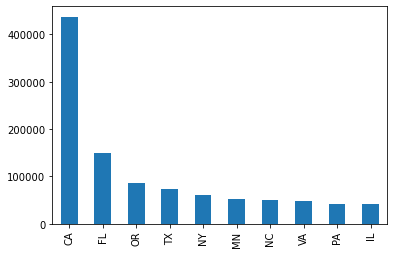

In [17]:
state[:10].plot(kind='bar')

In [18]:
# Number of County 
county = df.County.unique()
len(county)

1671

In [19]:
# What are the unique 'County' of US where accidents have taken place?
county = accident_df['County'].value_counts()
county.head(10)

Los Angeles       134347
Orange             49157
Miami-Dade         46631
San Bernardino     29962
San Diego          26325
Sacramento         25844
Alameda            24695
Riverside          24042
Mecklenburg        23716
Dallas             23662
Name: County, dtype: int64

<AxesSubplot:>

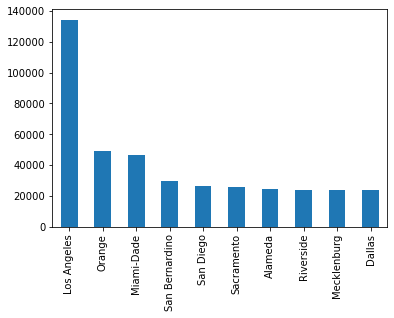

In [20]:
county[:10].plot(kind='bar')

In [21]:
# Number of city 
city = accident_df.City.unique()
len(city)

10446

In [22]:
# What are the unique 'City' of US where accidents have taken place?
city = accident_df['City'].value_counts()
city.head(10)

Los Angeles    39603
Miami          35590
Charlotte      22136
Houston        20570
Dallas         19390
Sacramento     18364
Orlando        15992
Portland       14776
San Diego      13982
Minneapolis    12627
Name: City, dtype: int64

<AxesSubplot:>

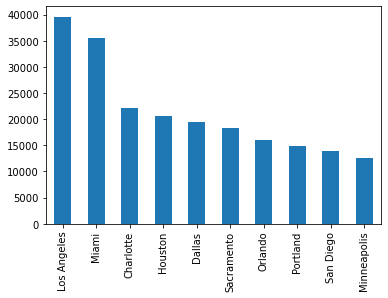

In [23]:
city[:10].plot(kind='bar')

## - Show the accidents on US MAP

In [24]:
lat, lon = accident_df.Start_Lat[0], accident_df.Start_Lng[0]
lat, lon 

(40.10891, -83.09286)

In [25]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])

1306231    37.866440
1075805    33.873720
563350     39.277678
347206     33.875064
855201     34.036820
             ...    
854689     34.172140
1479654    40.900610
815426     37.562210
561898     37.295268
1285056    33.717520
Name: Start_Lat, Length: 100, dtype: float64
1306231   -122.038780
1075805   -118.232050
563350     -77.323526
347206     -78.618321
855201    -118.377550
              ...    
854689    -118.570930
1479654    -74.134400
815426     -77.501720
561898    -120.479260
1285056    -85.020750
Name: Start_Lng, Length: 100, dtype: float64


In [26]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [27]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [28]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

## - Change datatype of the Start Time & End Time 

In [29]:
accident_df.Start_Time = pd.to_datetime(accident_df.Start_Time)
accident_df.End_Time = pd.to_datetime(accident_df.End_Time)

In [30]:
accident_df.dtypes

ID                        object
Severity                   int64
Start_Time        datetime64[ns]
End_Time          datetime64[ns]
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
Side                      object
City                      object
County                    object
State                     object
Country                   object
Visibility(mi)           float64
Sunrise_Sunset            object
dtype: object

In [31]:
accident_df.Start_Time.head(2)

0   2016-02-08 00:37:08
1   2016-02-08 05:56:20
Name: Start_Time, dtype: datetime64[ns]

In [32]:
accident_df.End_Time.head(2)

0   2016-02-08 06:37:08
1   2016-02-08 11:56:20
Name: End_Time, dtype: datetime64[ns]

## - New feature Amount of time in the unit of minutes for each accident

In [33]:
accident_df['Time_Duration(min)']=round((accident_df['End_Time'] - accident_df['Start_Time'])/np.timedelta64(1,'m'))

In [34]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1471775 entries, 0 to 1516063
Data columns (total 19 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   ID                  1471775 non-null  object        
 1   Severity            1471775 non-null  int64         
 2   Start_Time          1471775 non-null  datetime64[ns]
 3   End_Time            1471775 non-null  datetime64[ns]
 4   Start_Lat           1471775 non-null  float64       
 5   Start_Lng           1471775 non-null  float64       
 6   End_Lat             1471775 non-null  float64       
 7   End_Lng             1471775 non-null  float64       
 8   Distance(mi)        1471775 non-null  float64       
 9   Description         1471775 non-null  object        
 10  Street              1471775 non-null  object        
 11  Side                1471775 non-null  object        
 12  City                1471775 non-null  object        
 13  County      

In [35]:
accident_df.head(1)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,Side,City,County,State,Country,Visibility(mi),Sunrise_Sunset,Time_Duration(min)
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.23,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Outerbelt E,R,Dublin,Franklin,OH,US,10.0,Night,360.0


In [36]:
# Check if there is any negative time_duration values
accident_df['Time_Duration(min)'][accident_df['Time_Duration(min)']<=0]

Series([], Name: Time_Duration(min), dtype: float64)

In [37]:
neg_outliers=accident_df['Time_Duration(min)']<=0

# Set outliers to NAN
accident_df[neg_outliers] = np.nan

# Drop rows with negative td
accident_df.dropna(subset=['Time_Duration(min)'],axis=0,inplace=True)
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1471775 entries, 0 to 1516063
Data columns (total 19 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   ID                  1471775 non-null  object        
 1   Severity            1471775 non-null  float64       
 2   Start_Time          1471775 non-null  datetime64[ns]
 3   End_Time            1471775 non-null  datetime64[ns]
 4   Start_Lat           1471775 non-null  float64       
 5   Start_Lng           1471775 non-null  float64       
 6   End_Lat             1471775 non-null  float64       
 7   End_Lng             1471775 non-null  float64       
 8   Distance(mi)        1471775 non-null  float64       
 9   Description         1471775 non-null  object        
 10  Street              1471775 non-null  object        
 11  Side                1471775 non-null  object        
 12  City                1471775 non-null  object        
 13  County      

In [38]:
# Remove outliers for Time_Duration(min): n * std (n=3), 

n=3
median = accident_df['Time_Duration(min)'].median()
std = accident_df['Time_Duration(min)'].std()
outliers = (accident_df['Time_Duration(min)'] - median).abs() > std*n

# Set outliers to NULL
accident_df[outliers] = np.nan

# Fill  with median
accident_df['Time_Duration(min)'].fillna(median, inplace=True) 

accident_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1471775 entries, 0 to 1516063
Data columns (total 19 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   ID                  1470981 non-null  object        
 1   Severity            1470981 non-null  float64       
 2   Start_Time          1470981 non-null  datetime64[ns]
 3   End_Time            1470981 non-null  datetime64[ns]
 4   Start_Lat           1470981 non-null  float64       
 5   Start_Lng           1470981 non-null  float64       
 6   End_Lat             1470981 non-null  float64       
 7   End_Lng             1470981 non-null  float64       
 8   Distance(mi)        1470981 non-null  float64       
 9   Description         1470981 non-null  object        
 10  Street              1470981 non-null  object        
 11  Side                1470981 non-null  object        
 12  City                1470981 non-null  object        
 13  County      

## Max time to clear an accident

In [39]:
max_time_minutes = accident_df['Time_Duration(min)'].max()
max_time_hours = round(accident_df['Time_Duration(min)'].max()/60)
max_time_days = round(accident_df['Time_Duration(min)'].max()/60/24)
min_time_minutes = accident_df['Time_Duration(min)'].min()

print('Max time to clear an accident by {} minutes ' .format(max_time_minutes))
print('Max time to clear an accident by {} hours ' .format(max_time_hours))
print('Max time to clear an accident by {} days ' .format(max_time_days))
print('Min time to clear an accident by {} minutes ' .format(min_time_minutes))



Max time to clear an accident by 17409.0 minutes 
Max time to clear an accident by 290 hours 
Max time to clear an accident by 12 days 
Min time to clear an accident by 5.0 minutes 


## Dose the weekend affect the number of accidents

In [40]:
from datetime import datetime
from datetime import date

accident_df['Is_Weekend'] = accident_df['Start_Time'].dt.weekday > 4

In [41]:
# Show number of accidents in weekday and weekend
weekend = accident_df.Is_Weekend
weekend = accident_df.groupby([weekend]).count().sort_values(by = "ID").iloc[:,[0]]
weekend = weekend.reset_index()
weekend.rename(columns={'ID': '#Accident'}, inplace=True)
weekend

,Is_Weekend,#Accident
0,True,249176
1,False,1221805


## - Dose the weekend affect the severity of accidents (New Feature)

In [42]:
# Show severity of accidents in weekday and weekend
weekend_Severity = accident_df.groupby(['Is_Weekend','Severity']).count().sort_values(by = "ID").iloc[:,[0]]
weekend_Severity = weekend_Severity.reset_index()
weekend_Severity.rename(columns={'ID': '#Accident'}, inplace=True)
weekend_Severity

,Is_Weekend,Severity,#Accident
0,True,1.0,4319
1,True,4.0,23282
2,False,1.0,23515
3,True,3.0,24623
4,False,4.0,87177
5,False,3.0,132285
6,True,2.0,196952
7,False,2.0,978828


## - What times with the most accidents? 

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

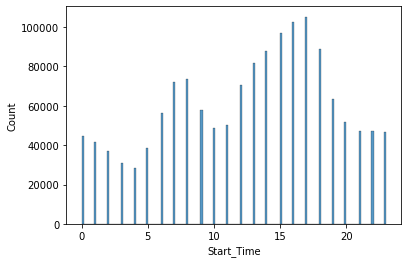

In [43]:
# Show the time that has most accidents 
sns.histplot(accident_df.Start_Time.dt.hour)

## - Compare number of accidents of each year [2016, 2017, 2018, 2019, 2020] 

In [44]:
times = pd.to_datetime(accident_df.Start_Time)
times = accident_df.groupby([times.dt.year]).count().sort_values(by = "ID").iloc[:,[0]]
times = times.reset_index()

In [45]:
# Change coloumn name
times['Start_Time'] = pd.to_numeric(times['Start_Time'], downcast='signed')
times.rename(columns={'Start_Time': 'Year' ,  'ID': '#Accident'}, inplace=True)


times

,Year,#Accident
0,2016,126196
1,2018,161859
2,2017,165401
3,2019,254508
4,2020,763017


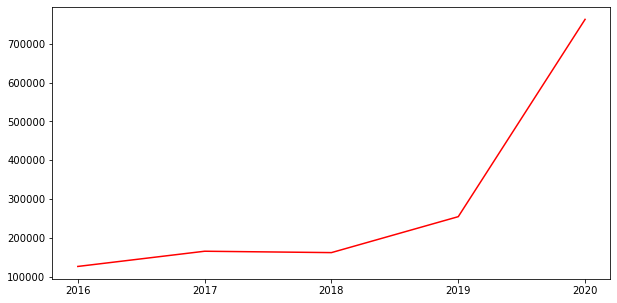

In [46]:
times = times.head().sort_values(by = "Year")

a4_dims = (10, 5)
fig, ax = plt.subplots(figsize=a4_dims)
x = times['Year']
y = times['#Accident']

plt.plot(x, y, color='Red')
plt.xticks([2016,2017,2018,2019,2020])
plt.show()

## - Compare number of accedint in Day & Night

In [47]:
day_night = accident_df.Sunrise_Sunset
day_night = accident_df.groupby([day_night]).count().sort_values(by = "ID").iloc[:,[0]]
day_night = day_night.reset_index()

In [48]:
day_night.rename(columns={'Sunrise_Sunset': 'Day/Night', 'ID': '#Accident'}, inplace=True)
day_night

,Day/Night,#Accident
0,Night,585467
1,Day,885514


## - Compare number of accedint in severity

In [49]:
# How the severity of accedint affect 

severity = accident_df.Severity
severity=accident_df.groupby([severity]).count().sort_values(by = "ID").iloc[:,[0]]
severity=severity.reset_index()


In [50]:
severity.rename(columns={'ID': '#Accident'}, inplace=True)


severity

,Severity,#Accident
0,1.0,27834
1,4.0,110459
2,3.0,156908
3,2.0,1175780


## - Show the severity of the accidents during the day or night

In [51]:
day_severity = accident_df.groupby(['Severity', 'Sunrise_Sunset'] ).count().sort_values(by = "ID").iloc[:,[0]]
day_severity = day_severity.reset_index()

In [52]:
day_severity.rename(columns={'Sunrise_Sunset': 'Day/Night', 'ID': '#Accident'}, inplace=True)

day_severity

,Severity,Day/Night,#Accident
0,1.0,Night,4704
1,1.0,Day,23130
2,4.0,Night,45502
3,3.0,Night,48259
4,4.0,Day,64957
5,3.0,Day,108649
6,2.0,Night,487002
7,2.0,Day,688778


## - Show the data of New York county 

In [53]:
# Set state
state='NY'

# Select the state of Pennsylvania
df_state=accident_df.loc[accident_df.State==state].copy()
df_state.drop('State',axis=1, inplace=True)
df_state.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,Side,City,County,Country,Visibility(mi),Sunrise_Sunset,Time_Duration(min),Is_Weekend
32547,A-2749147,2.0,2016-11-30 15:58:59,2016-11-30 21:58:59,40.850020,-73.943990,40.85329,-73.96064,0.899,Between Amsterdam Ave/Harlem River Dr and Huds...,George Washington Brg,R,New York,New York,US,2.0,Day,360.0,False
32574,A-2749174,2.0,2016-11-30 17:13:53,2016-11-30 23:13:53,41.311771,-74.121299,41.12997,-74.16773,12.791,Between RT-17/Toll Plaza/Exit 16 and RT-17/RT-...,I-87 S,R,Central Valley,Orange,US,3.0,Night,360.0,False
32576,A-2749176,2.0,2016-11-30 17:12:20,2016-11-30 23:12:20,43.039261,-76.142130,43.04273,-76.14244,0.240,At Adams St/Exit 18 - Accident.,I-81 S,R,Syracuse,Onondaga,US,10.0,Night,360.0,False
32593,A-2749193,2.0,2016-11-30 17:31:55,2016-11-30 23:31:55,40.771460,-73.946580,40.76878,-73.94906,0.226,At 79th St - Accident.,FDR Dr S,R,New York,New York,US,2.5,Night,360.0,False
32598,A-2749198,2.0,2016-11-30 17:46:05,2016-11-30 23:46:05,42.657380,-73.741570,42.67173,-73.72838,1.197,At I-90/Exit 5 - Accident.,I-787 N,R,Albany,Albany,US,10.0,Night,360.0,False


In [54]:
# Set county
county='New York'

df_county=df_state.loc[df_state.County==county].copy()
df_county.drop('County',axis=1, inplace=True)
df_county.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,Side,City,Country,Visibility(mi),Sunrise_Sunset,Time_Duration(min),Is_Weekend
32547,A-2749147,2.0,2016-11-30 15:58:59,2016-11-30 21:58:59,40.850020,-73.943990,40.853290,-73.960640,0.899,Between Amsterdam Ave/Harlem River Dr and Huds...,George Washington Brg,R,New York,US,2.0,Day,360.0,False
32593,A-2749193,2.0,2016-11-30 17:31:55,2016-11-30 23:31:55,40.771460,-73.946580,40.768780,-73.949060,0.226,At 79th St - Accident.,FDR Dr S,R,New York,US,2.5,Night,360.0,False
32683,A-2749283,3.0,2016-11-26 22:57:16,2016-12-01 04:44:45,40.762979,-73.973938,40.762956,-73.973953,0.002,Between 65th St/66th St and 34th St - Accident.,W 57th St,L,New York,US,10.0,Night,6107.0,True
32901,A-2749501,3.0,2016-12-01 12:14:13,2016-12-01 18:14:13,40.744340,-73.971240,40.748080,-73.967930,0.311,At 42nd St/Exit 9 - Accident.,FDR Dr N,R,New York,US,10.0,Day,360.0,False
33361,A-2749961,2.0,2016-12-02 12:40:48,2016-12-02 18:40:48,40.838730,-73.933270,40.846976,-73.932792,0.570,At I-95/Amsterdam Ave/Exit 23 - Accident.,Harlem River Dr N,R,New York,US,10.0,Day,360.0,False


## -
# To Be Continu ..
## -